* Find the communities for the dataset  *OF_two-mode_weightedmsg.txt*. Hint: `data = np.loadtxt("data/OF_two-mode_weightedmsg.txt").astype(np.int)`
* Filter the dataset for a threshold of w1 = 5, how many communities the network have upon filtering the edges with betweenness of around 80% of the max value.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# load data
data = np.loadtxt("data/OF_two-mode_weightedmsg.txt").astype(np.int)
#data = np.loadtxt("data/OF_two-mode_weightedmsg.txt").astype(np.int)
print(data)

[[  1   1   1]
 [  1  39   9]
 [  1 102   2]
 ...
 [897  59   4]
 [898 357   1]
 [899  52   1]]


In [3]:
# make the graph
N = 899    # nodes
w1 = 5    # threshold's weight 

G = nx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

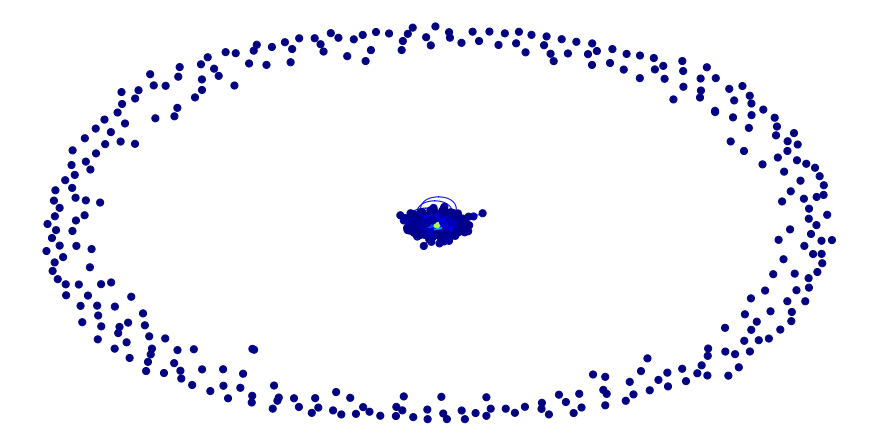

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = nx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

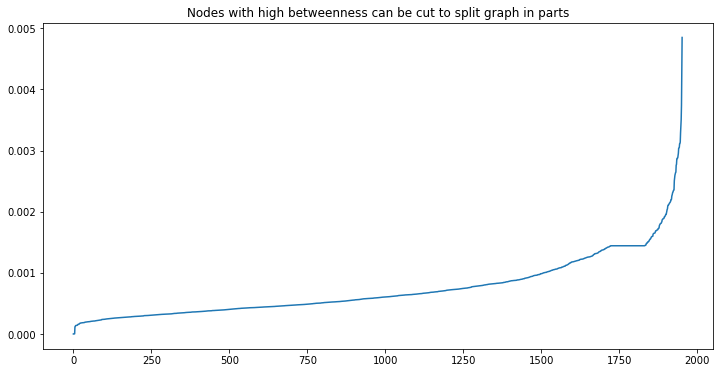

In [7]:
bt = list(nx.edge_betweenness(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.08])
plt.show()

In [17]:
thr = 0.0005 # around 80% of the max value
while True:
    bt = nx.edge_betweenness(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(nx.degree(G)):
    if d == 0:
        G.remove_node(n)

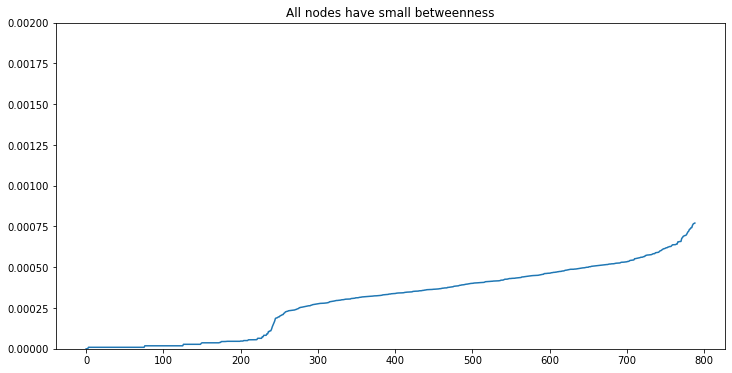

In [18]:
# print new betweenness
bt = nx.edge_betweenness(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.002])
plt.show()